In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
filename = "vw.csv"
df = pd.read_csv(filename)

# Processamento e Exploração dos dados

In [3]:
df.shape

(15157, 9)

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df[df.tax == 0.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
129,T-Roc,2017,13995,Manual,20706,Petrol,0,65.7,1.0
745,Golf,2013,9000,Manual,22400,Diesel,0,68.9,1.6
752,Golf,2015,8485,Manual,52365,Diesel,0,68.9,1.6
753,Golf,2014,8385,Manual,45703,Diesel,0,68.9,1.6
765,Golf,2014,8990,Manual,53000,Diesel,0,68.9,1.6
...,...,...,...,...,...,...,...,...,...
14694,Golf SV,2016,10550,Manual,16739,Diesel,0,72.4,1.6
14696,Golf SV,2015,8950,Manual,45000,Diesel,0,72.4,1.6
14701,Golf SV,2015,9695,Manual,21151,Diesel,0,72.4,1.6
14721,Golf SV,2014,8650,Manual,32535,Diesel,0,72.4,1.6


In [8]:
df[df.engineSize == 0.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
649,T-Roc,2019,22000,Automatic,2009,Petrol,145,39.8,0.0
664,T-Roc,2018,23000,Automatic,27327,Diesel,145,51.4,0.0
4734,Golf,2015,11800,Manual,36205,Diesel,20,68.9,0.0
4761,Golf,2019,18000,Manual,5073,Petrol,145,50.4,0.0
4768,Golf,2017,12600,Manual,20340,Diesel,0,74.3,0.0
6347,Passat,2018,17000,Manual,18169,Petrol,145,56.5,0.0
6351,Passat,2017,16000,Manual,13593,Diesel,150,68.9,0.0
6354,Passat,2018,19500,Automatic,22283,Petrol,145,48.7,0.0
6356,Passat,2019,18500,Automatic,11993,Petrol,145,41.5,0.0
11559,Tiguan,2017,19200,Manual,18002,Diesel,150,58.9,0.0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df[df.engineSize > 0.0]
df = df[df.tax > 0.0]

In [11]:
df['km'] = df['mileage'].apply(lambda x: round(float(x * 1.609)))
del df['mileage']

<AxesSubplot:xlabel='count', ylabel='year'>

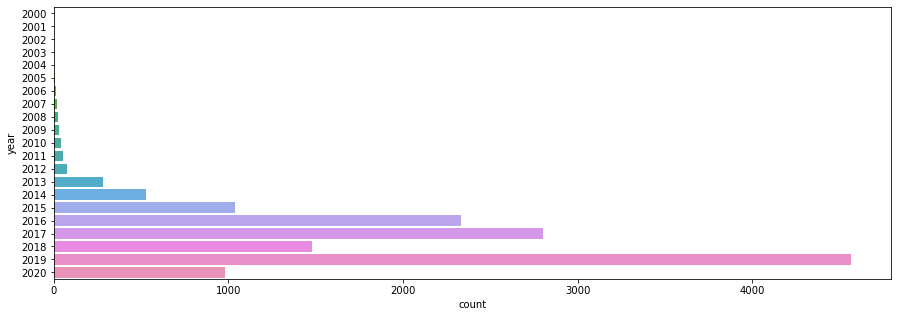

In [12]:
plt.figure(figsize = (15, 5))
sns.countplot(data=df, y="year")

<AxesSubplot:xlabel='price', ylabel='Count'>

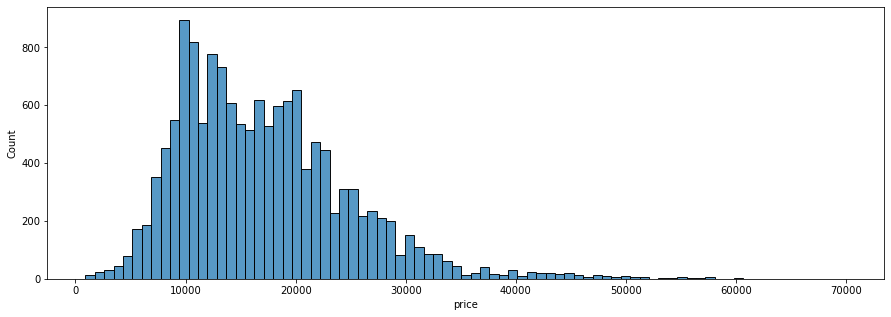

In [13]:
plt.figure(figsize = (15, 5))
sns.histplot(data=df, x="price")

<AxesSubplot:xlabel='year', ylabel='price'>

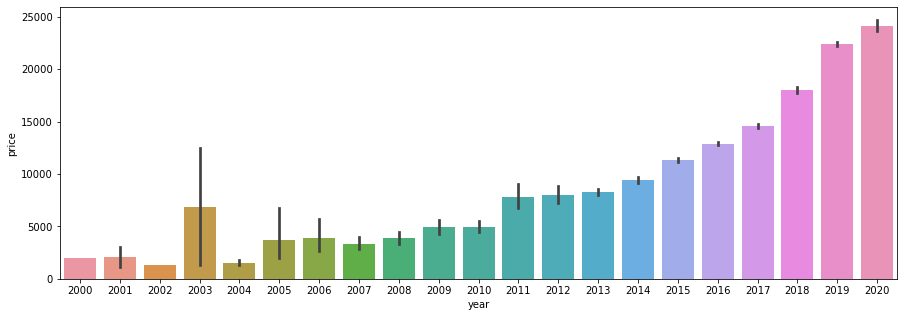

In [14]:
plt.figure(figsize = (15, 5))
sns.barplot(x = "year", y = "price", data=df)

<AxesSubplot:xlabel='km', ylabel='Count'>

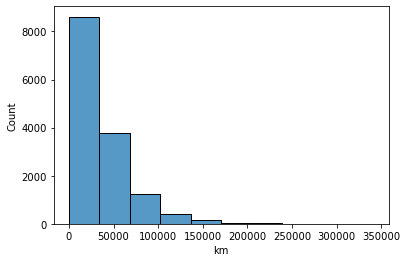

In [15]:
sns.histplot(data=df, x="km", bins=10)

<AxesSubplot:xlabel='year', ylabel='km'>

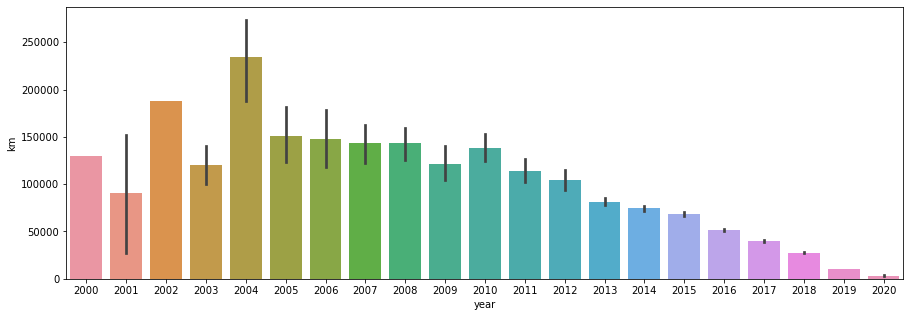

In [16]:
plt.figure(figsize = (15, 5))
sns.barplot(x = "year", y = "km", data=df)

<AxesSubplot:xlabel='km', ylabel='price'>

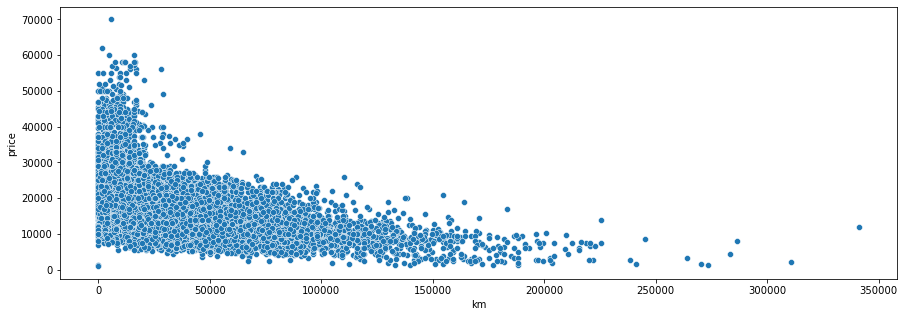

In [17]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "km", y = "price", data=df)

<AxesSubplot:xlabel='fuelType', ylabel='count'>

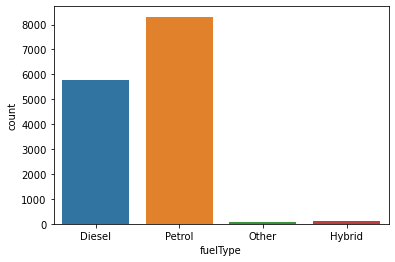

In [18]:
sns.countplot(data=df, x="fuelType")

<AxesSubplot:xlabel='fuelType', ylabel='price'>

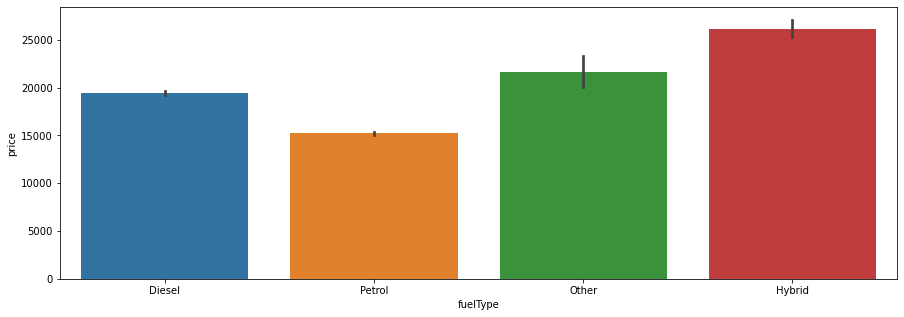

In [19]:
plt.figure(figsize = (15, 5))
sns.barplot(y = "price", x = "fuelType", data=df)

<AxesSubplot:xlabel='engineSize', ylabel='count'>

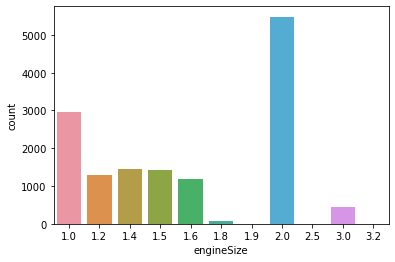

In [20]:
sns.countplot(data=df, x="engineSize")

<AxesSubplot:xlabel='engineSize', ylabel='price'>

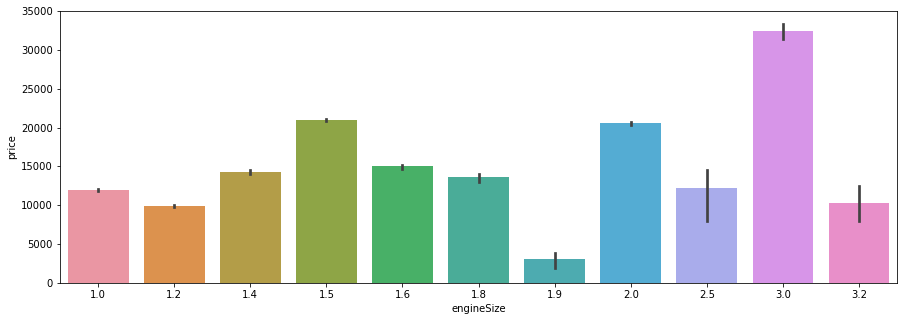

In [21]:
plt.figure(figsize = (15, 5))
sns.barplot(y = "price", x = "engineSize", data=df)

<AxesSubplot:xlabel='engineSize', ylabel='price'>

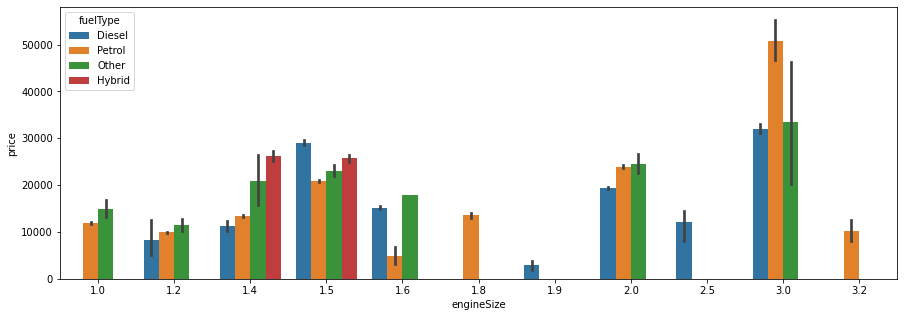

In [22]:
plt.figure(figsize = (15, 5))
sns.barplot(y = "price", x = "engineSize", hue="fuelType", data=df)

<AxesSubplot:xlabel='transmission', ylabel='count'>

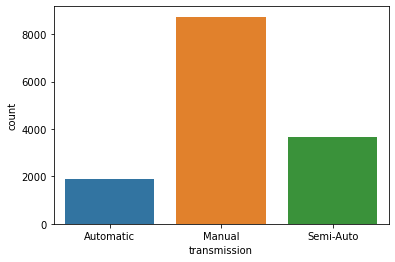

In [23]:
sns.countplot(x = "transmission", data = df)

<AxesSubplot:xlabel='transmission', ylabel='price'>

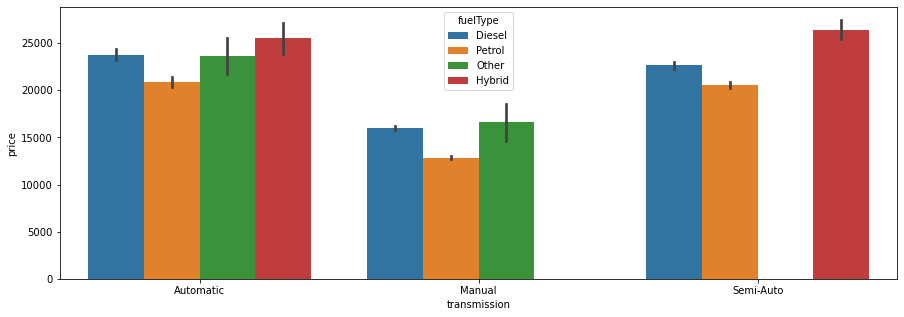

In [24]:
plt.figure(figsize = (15, 5))
sns.barplot(y = "price", x = "transmission", hue="fuelType", data=df)

<AxesSubplot:xlabel='model', ylabel='price'>

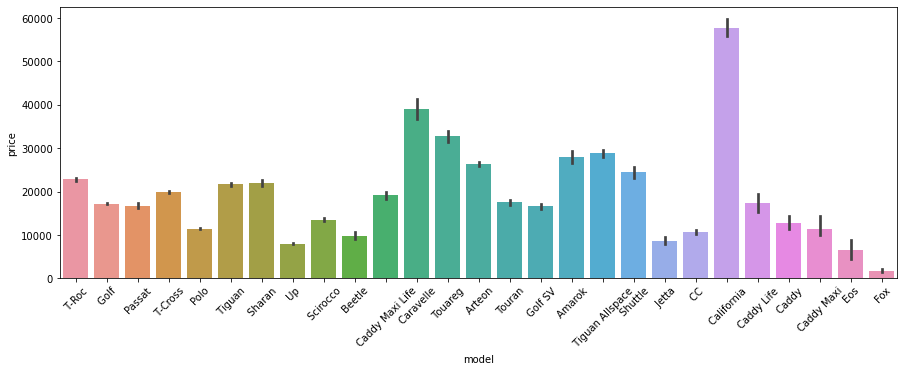

In [25]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation=45)
sns.barplot(y = "price", x = "model", data=df)

In [26]:
df[df['model'].str.contains("California")]

,model,year,price,transmission,fuelType,tax,mpg,engineSize,km
15113,California,2019,55999,Automatic,Diesel,260,32.1,2.0,14132
15114,California,2019,56995,Semi-Auto,Diesel,260,33.2,2.0,14467
15115,California,2019,52995,Manual,Diesel,260,44.1,2.0,20748
15116,California,2019,54995,Semi-Auto,Diesel,260,32.1,2.0,5632
15117,California,2020,61995,Semi-Auto,Diesel,260,32.1,2.0,1609
15118,California,2018,54999,Automatic,Diesel,260,44.1,2.0,12655
15119,California,2019,69994,Semi-Auto,Diesel,260,29.1,2.0,5702
15120,California,2019,54999,Automatic,Diesel,265,32.1,2.0,16896
15121,California,2019,52991,Automatic,Diesel,260,32.1,2.0,12470
15122,California,2019,57991,Automatic,Diesel,260,33.2,2.0,7487


<AxesSubplot:>

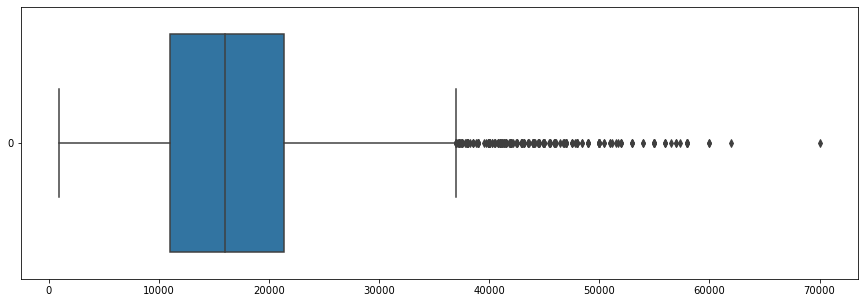

In [27]:
plt.figure(figsize = (15, 5))
sns.boxplot(data=df["price"], orient="h")

# Pré-processamento dos dados

## Padronização dos dados

<AxesSubplot:>

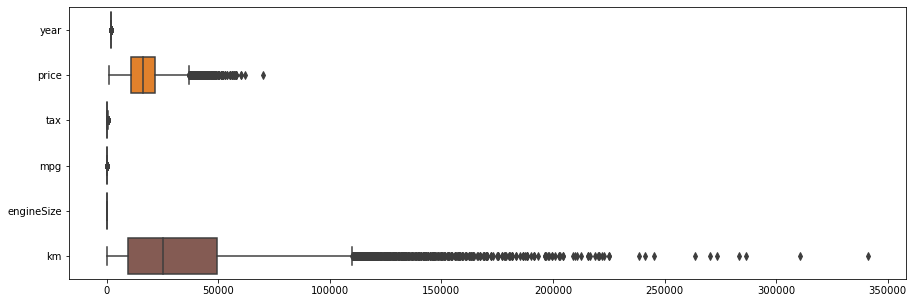

In [28]:
plt.figure(figsize = (15, 5))
sns.boxplot(data=df, orient="h")

<AxesSubplot:>

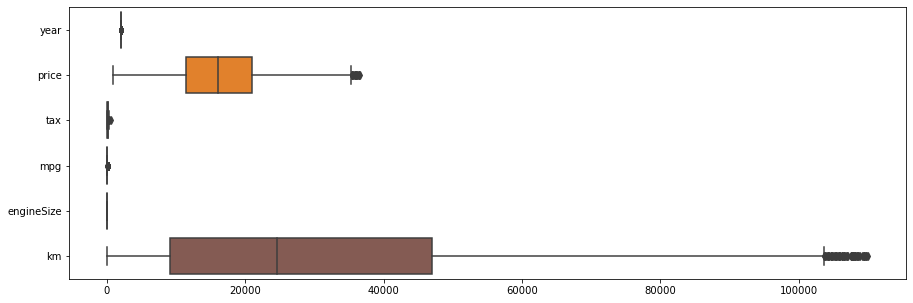

In [29]:
#IQR (intervalo interquartil)
def handle_outlier_column(column):
    Q1, Q3 = np.percentile(column, [25, 75])
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    return lower, upper

lowerKm, upperKm = handle_outlier_column(df["km"])
df.drop(df[(df.km > upperKm) | (df.km < lowerKm)].index, inplace=True)

lowerPrice, upperPrice = handle_outlier_column(df["price"])
df.drop(df[(df.price > upperPrice) | (df.price < lowerPrice)].index, inplace=True)

plt.figure(figsize = (15, 5))
sns.boxplot(data=df, orient="h")

In [30]:
df_aux = df
df_aux_dum = pd.get_dummies(df_aux)
df_aux_dum

,year,price,tax,mpg,engineSize,km,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,25000,145,49.6,2.0,22372,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2019,26883,145,49.6,2.0,7340,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2019,20000,145,50.4,2.0,11929,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2019,33492,145,32.5,2.0,7763,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,22900,150,39.8,1.5,10458,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,2017,15950,145,56.5,2.0,41046,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
15146,2011,7195,185,41.5,1.4,69187,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15147,2008,4995,195,48.0,2.0,104585,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
15149,2015,12495,125,58.9,2.0,67337,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [31]:
# plt.figure(figsize = (15, 15))
# sns.heatmap(df_aux_dum.corr(method="pearson"))
corr = df_aux_dum.corr(method="pearson")
corr_unstack = corr.unstack()
corr_sorted = corr_unstack.sort_values(kind="quicksort")
corr_sorted

fuelType_Diesel         fuelType_Petrol       -0.970387
fuelType_Petrol         fuelType_Diesel       -0.970387
km                      year                  -0.758724
year                    km                    -0.758724
transmission_Semi-Auto  transmission_Manual   -0.745808
                                                 ...   
model_ Sharan           model_ Sharan          1.000000
model_ Scirocco         model_ Scirocco        1.000000
model_ Polo             model_ Polo            1.000000
model_ Jetta            model_ Jetta           1.000000
fuelType_Petrol         fuelType_Petrol        1.000000
Length: 1444, dtype: float64

In [32]:
X = df_aux_dum.drop('price', axis=1)
Y = df_aux_dum.price

scaler = StandardScaler ()
df_scaler = scaler.fit_transform(X)
X = pd.DataFrame(df_scaler, columns = X.columns)

scalerPrice = StandardScaler()
y_scaler = scalerPrice.fit_transform(Y.values.reshape(-1,1))
Y = pd.DataFrame(y_scaler)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Modelos

In [33]:
models = [("LinearRegression", LinearRegression()), ("KNN", KNeighborsRegressor()), ("SVR", SVR())]
results = []

Model: LinearRegression 
 R2: 88.96 
 Residual Mean: -0.01 
 Residual STD: 0.33


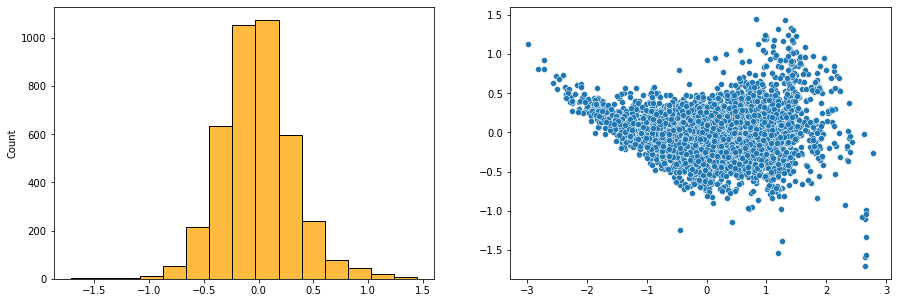

Model: KNN 
 R2: 95.88 
 Residual Mean: -0.02 
 Residual STD: 0.25


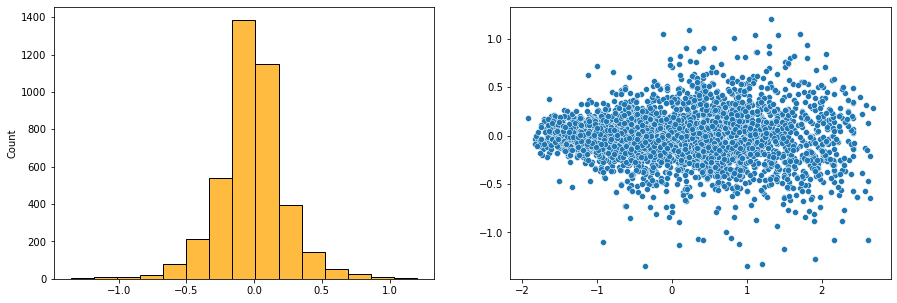

Model: SVR 
 R2: 94.07 
 Residual Mean: 0.00 
 Residual STD: 0.25


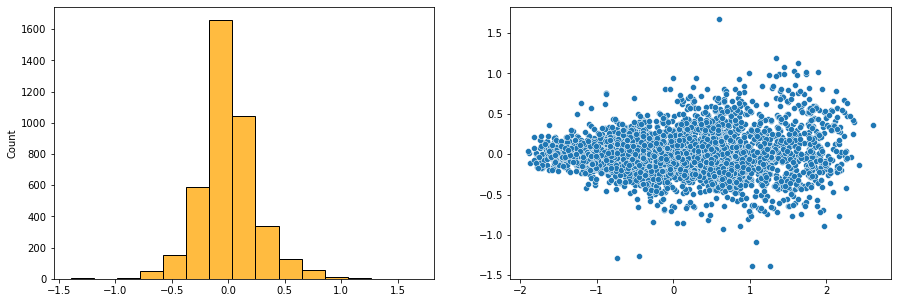

In [55]:
for name, model in models:
    model.fit(X_train, y_train.values.ravel())
    score = model.score(X_train, y_train)
    predict = model.predict(X_test)
    residuals = y_test.values.ravel() - predict
    
    print("Model: %s \n R2: %.2f \n Residual Mean: %.2f \n Residual STD: %.2f" % 
          (name, score * 100.0, residuals.mean(), residuals.std()))
    
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    sns.histplot(residuals, color='orange', bins=15, ax=axs[0])
    sns.scatterplot(y = residuals, x = predict, ax=axs[1])
    plt.show()
